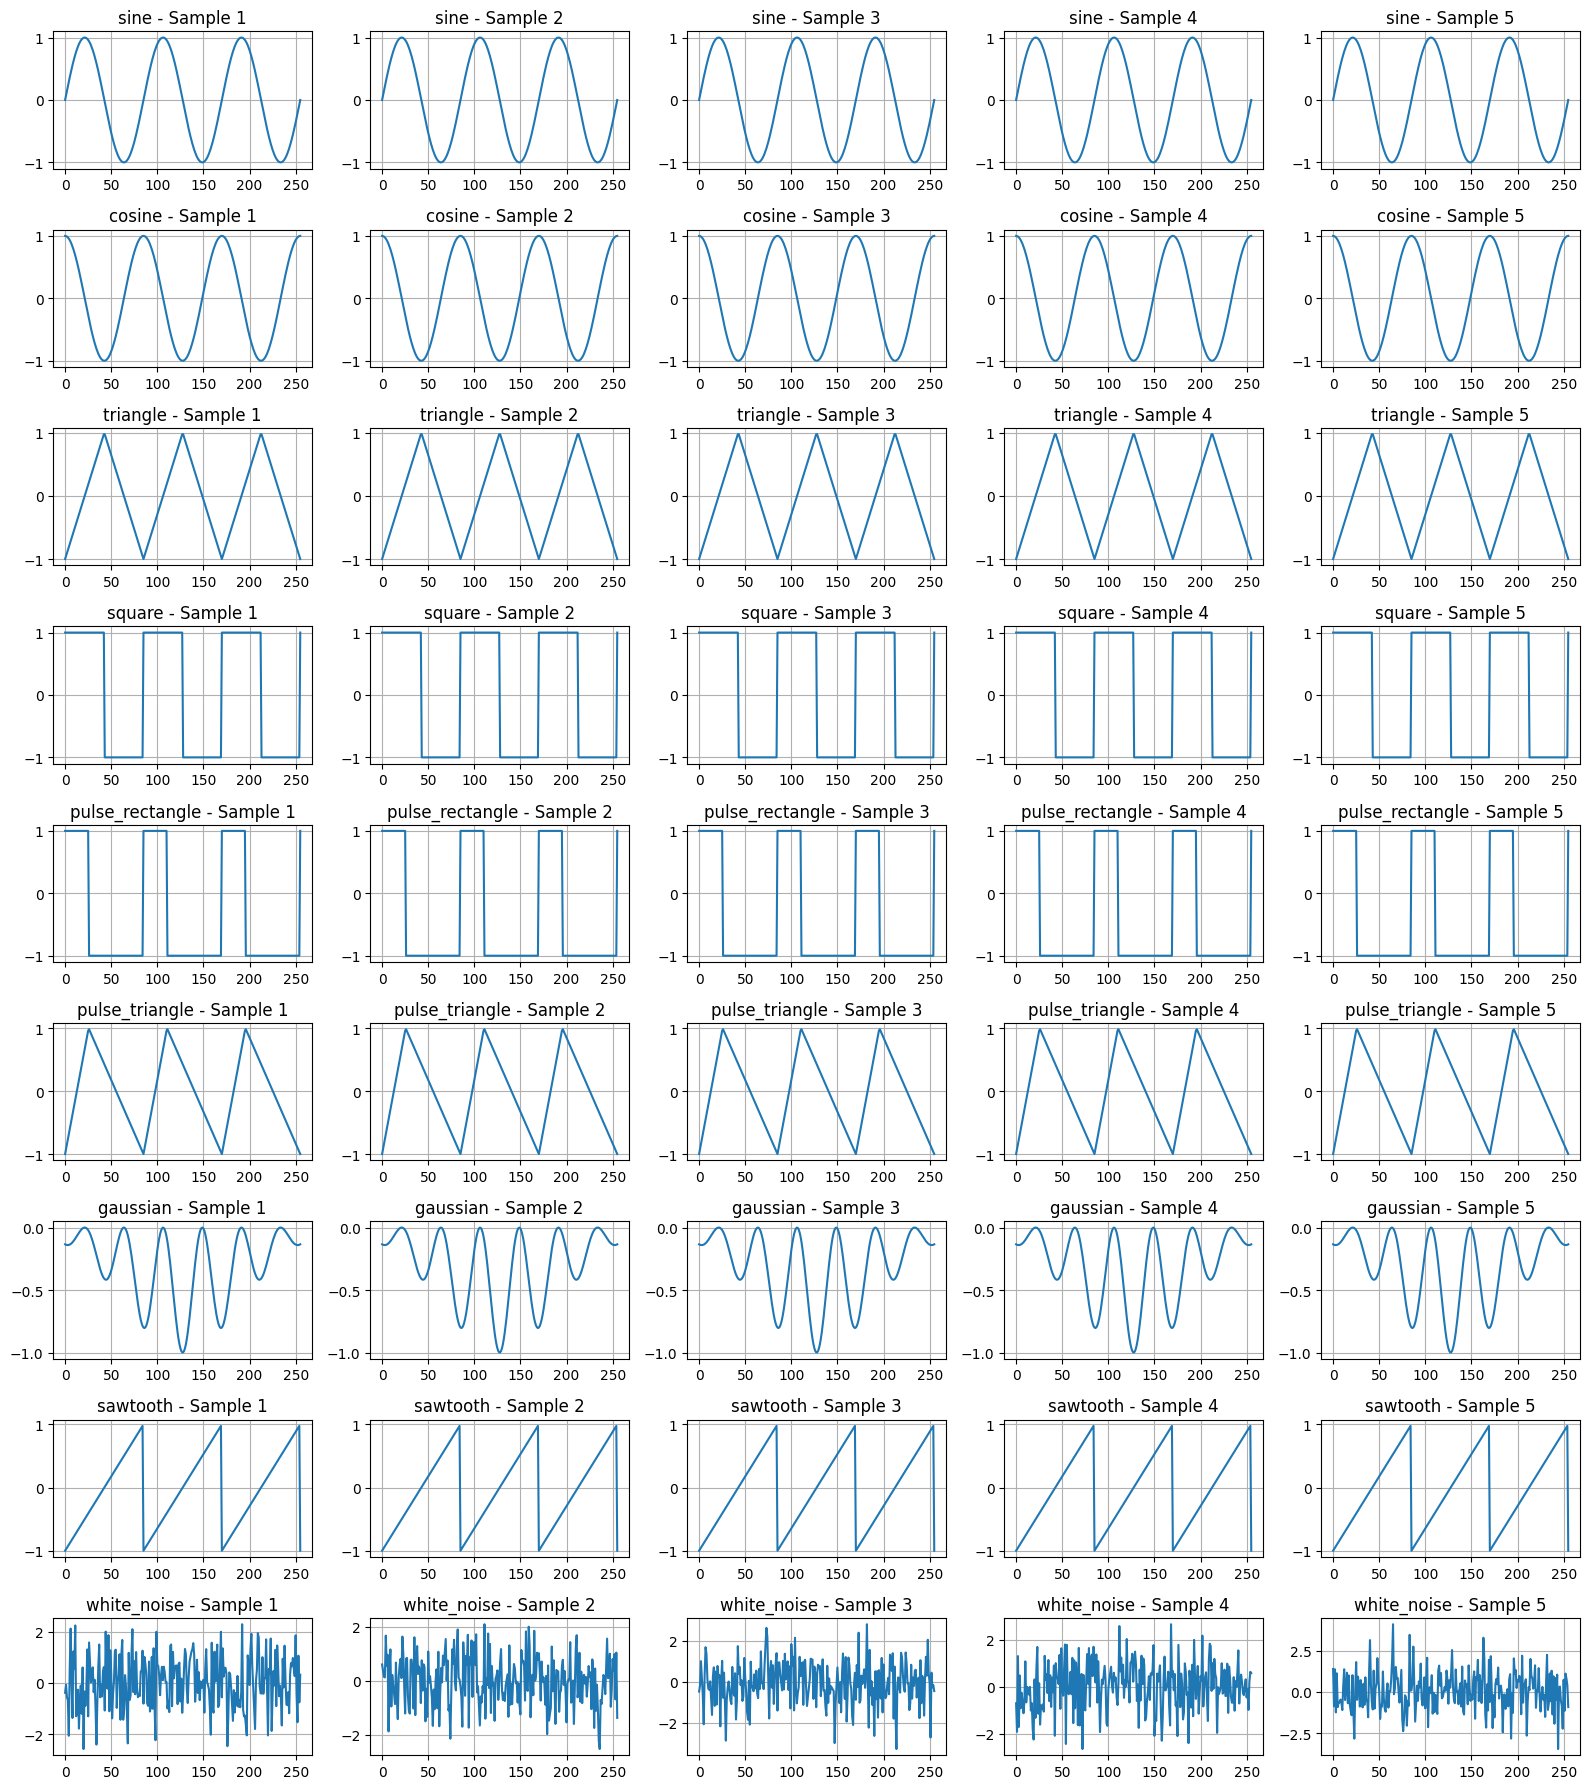

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from src.multiple_signal import MultipleSignal, CreateDataSet_1D_Array
from scipy import signal

# create a dataset with 3 classes: sine, square, and sawtooth
dataset = CreateDataSet_1D_Array()

dataset.plot_samples(num_samples=5)



In [12]:
# create dataset and ensure resulting array has homogeneous shape by padding/truncating sequences
_samples = dataset.create_dataset_tranning_model(num_samples_per_class=10)
_samples = list(_samples)

# try direct conversion, otherwise pad/truncate sequences (handles 1D and 2D samples)
try:
	sample = np.array(_samples)
except ValueError:
	lengths = [np.array(s).shape[0] for s in _samples]
	max_len = max(lengths)

	# inspect first sample to decide dims
	first = np.array(_samples[0])
	if first.ndim == 1:
		# 1D sequences -> (n_samples, max_len)
		sample = np.zeros((len(_samples), max_len), dtype=float)
		for i, s in enumerate(_samples):
			s_arr = np.array(s, dtype=float)
			L = s_arr.shape[0]
			if L <= max_len:
				sample[i, :L] = s_arr
			else:
				sample[i, :] = s_arr[:max_len]
	else:
		# multi-dimensional sequences (time, features) -> (n_samples, max_len, max_feat)
		feat_sizes = [np.array(s).shape[1] if np.array(s).ndim > 1 else 1 for s in _samples]
		max_feat = max(feat_sizes)
		sample = np.zeros((len(_samples), max_len, max_feat), dtype=float)
		for i, s in enumerate(_samples):
			s_arr = np.array(s, dtype=float)
			# ensure shape is (time, features)
			if s_arr.ndim == 1:
				s_arr = s_arr.reshape(-1, 1)
			L = s_arr.shape[0]
			F = s_arr.shape[1]
			t_copy = min(L, max_len)
			f_copy = min(F, max_feat)
			sample[i, :t_copy, :f_copy] = s_arr[:t_copy, :f_copy]

In [13]:
x,y = dataset.create_dataset_tranning_model(num_samples_per_class=1000)

In [14]:
x,y

(array([[ 0.00000000e+00,  7.38525275e-02,  1.47301698e-01, ...,
         -1.47301698e-01, -7.38525275e-02, -7.34788079e-16],
        [ 0.00000000e+00,  7.38525275e-02,  1.47301698e-01, ...,
         -1.47301698e-01, -7.38525275e-02, -7.34788079e-16],
        [ 0.00000000e+00,  7.38525275e-02,  1.47301698e-01, ...,
         -1.47301698e-01, -7.38525275e-02, -7.34788079e-16],
        ...,
        [ 8.11675052e-01, -1.19519661e+00,  1.13451899e+00, ...,
         -8.05096516e-01, -1.50320637e+00, -2.90218100e-01],
        [ 2.70708947e+00,  6.88952704e-02,  4.76228260e-02, ...,
         -9.91809856e-01,  9.25706806e-01,  1.29752535e+00],
        [ 2.14129276e+00, -6.90974502e-02,  5.42830202e-01, ...,
          3.10577244e-01,  1.77531685e+00, -1.31219945e+00]]),
 array([0, 0, 0, ..., 8, 8, 8]))

In [15]:
df = pd.DataFrame(list(zip(x,y)), columns=['signal', 'label'])

In [16]:
df.head()

,signal,label
0,"[0.0, 0.07385252747487396, 0.1473016980546375,...",0
1,"[0.0, 0.07385252747487396, 0.1473016980546375,...",0
2,"[0.0, 0.07385252747487396, 0.1473016980546375,...",0
3,"[0.0, 0.07385252747487396, 0.1473016980546375,...",0
4,"[0.0, 0.07385252747487396, 0.1473016980546375,...",0


In [17]:
df['label'].value_counts()

label
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
Name: count, dtype: int64

Linear Regression Model Training

Dataset: 5000 samples, 10 features
Target range: [-15.95, 15.81]
Using device: cpu

Data splits:
  Train batches: 28
  Val batches: 6
  Test batches: 6

Model architecture:
LinearRegressionModel(
  (network): Sequential(
    (0): Linear(in_features=10, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): Dropout(p=0.15, inplace=False)
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.1)
    (7): Dropout(p=0.15, inplace=False)
    (8): Linear(in_features=512, out_features=256, bias=True)
    (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.1)
    (11): Dropout(p=0.075, inplace=False)
    (12): Linear(in_features=256, out_features=128

c:\Users\jayes\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 1/300: Train Loss: 0.4380 | Train MAE: 0.4567 | Val Loss: 0.1531 | Val MAE: 0.3037 | LR: 0.001998
Epoch 10/300: Train Loss: 0.0205 | Train MAE: 0.1111 | Val Loss: 0.0066 | Val MAE: 0.0616 | LR: 0.001154
Epoch 20/300: Train Loss: 0.0155 | Train MAE: 0.0947 | Val Loss: 0.0027 | Val MAE: 0.0392 | LR: 0.000013
Epoch 30/300: Train Loss: 0.0279 | Train MAE: 0.1249 | Val Loss: 0.0042 | Val MAE: 0.0484 | LR: 0.001759
Epoch 40/300: Train Loss: 0.0186 | Train MAE: 0.1040 | Val Loss: 0.0030 | Val MAE: 0.0428 | LR: 0.001077
Epoch 50/300: Train Loss: 0.0248 | Train MAE: 0.1211 | Val Loss: 0.0026 | Val MAE: 0.0390 | LR: 0.000350
Epoch 60/300: Train Loss: 0.0163 | Train MAE: 0.0989 | Val Loss: 0.0034 | Val MAE: 0.0457 | LR: 0.000004
Epoch 70/300: Train Loss: 0.0209 | Train MAE: 0.1130 | Val Loss: 0.0074 | Val MAE: 0.0680 | LR: 0.001938
Epoch 80/300: Train Loss: 0.0225 | Train MAE: 0.1146 | Val Loss: 0.0071 | Val MAE: 0.0651 | LR: 0.001734

Early stopping triggered at epoch 89

Loaded best model

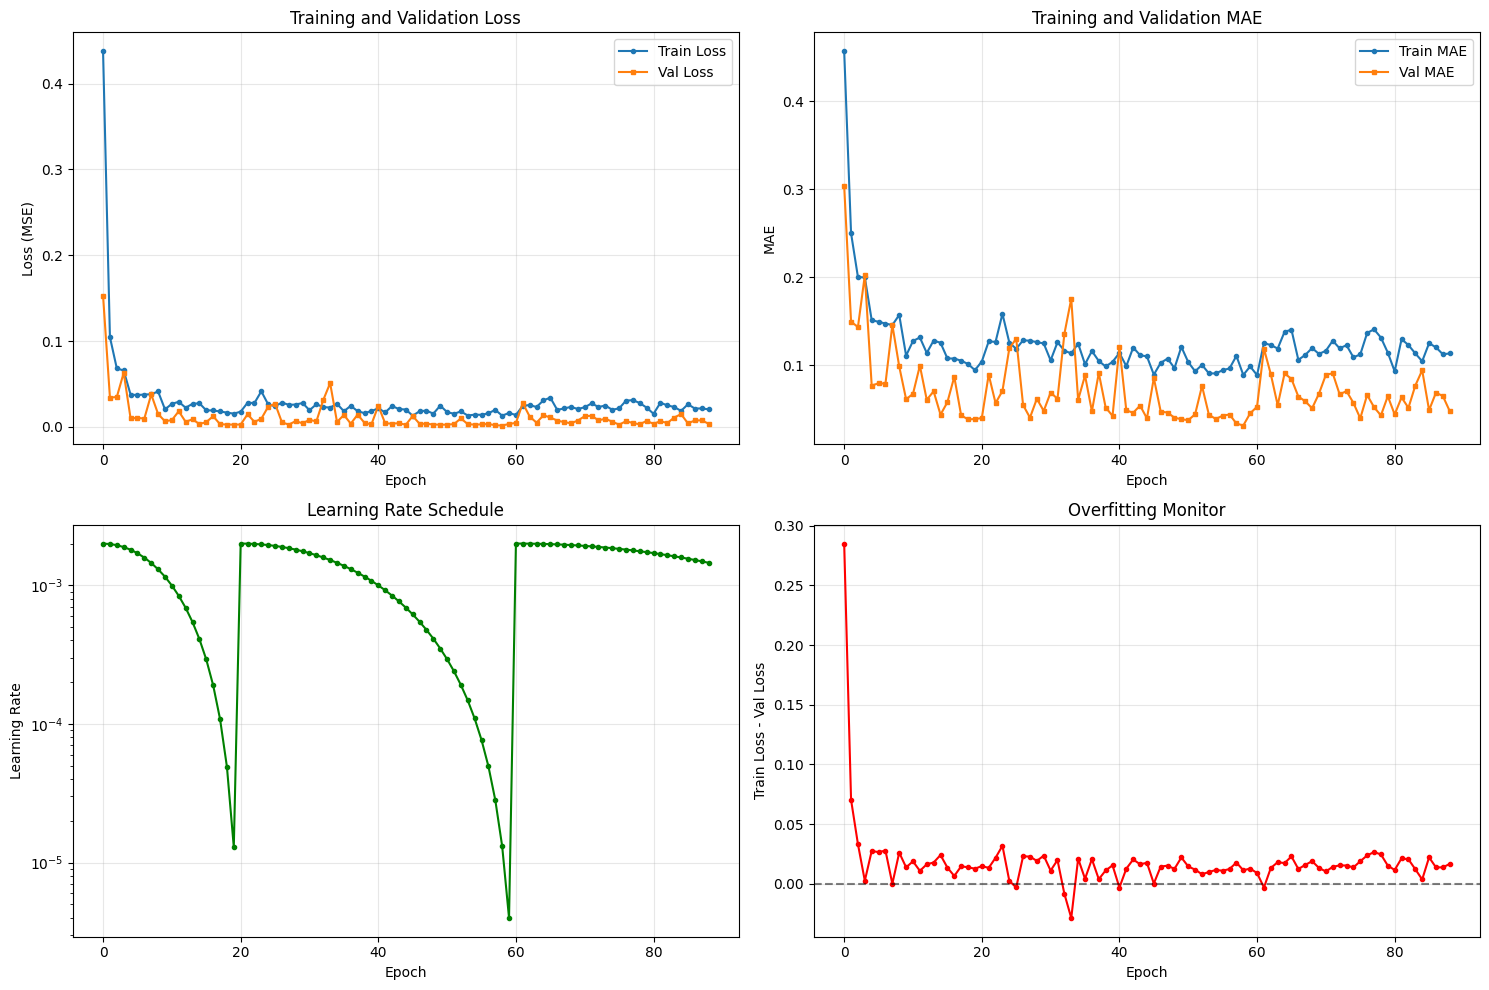


Evaluating on test set...

Test Metrics:
  Loss (MSE): 0.0034
  MAE: 0.0456
  RMSE: 0.0585
  R² Score: 0.996651
  MAPE: 13.77%
  Accuracy (tolerance=0.3): 100.00%

Plotting predictions...


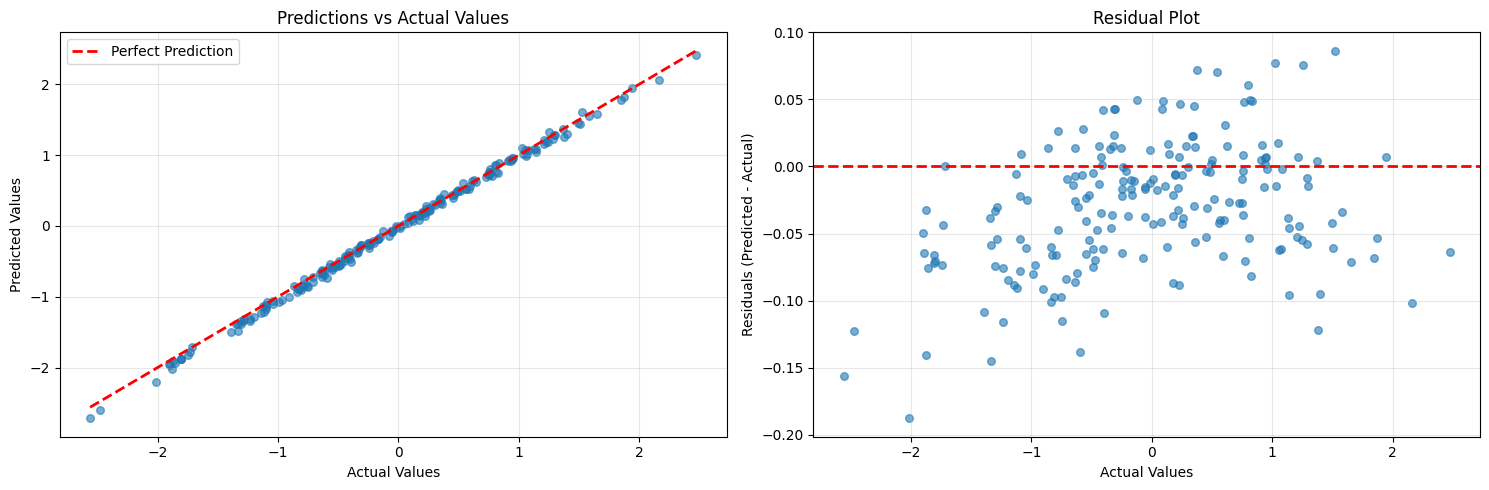


Model saved to 'linear_regression_model.pth'

Training completed successfully!


In [1]:
from src.linear_regression import LinearRegressionModel, main
main()

In [1]:
# load model and test on dataset
from src.linear_regression import LinearRegressionModel, main, load_model
model = 'linear_regression_model.pth'
load_model(model)


UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL numpy.core.multiarray.scalar was not an allowed global by default. Please use `torch.serialization.add_safe_globals([numpy.core.multiarray.scalar])` or the `torch.serialization.safe_globals([numpy.core.multiarray.scalar])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [2]:
from src.linear_regression import load_model, predict
import numpy as np
# Load the model (you need to specify input_size)
model, history, test_results = load_model(
    'linear_regression_model.pth', 
    input_size=10,  # Must match the training data
    hidden_neurons=512,
    dropout_rate=0.15,
    device='cpu'
)

# Make predictions on new data
new_X = np.random.randn(5, 10)  # 5 samples, 10 features
predictions = predict(model, new_X, device='cpu')
print(predictions)


Model loaded successfully from linear_regression_model.pth
Device: cpu
Previous test results:
  test_loss: 0.0034
  test_mae: 0.0456
  r2_score: 0.9967
  mape: 13.7736
  test_accuracy: 1.0000
[-0.1441354   0.61180425  1.0498552   0.2731025   0.51477075]


In [3]:
test_results

{'test_loss': 0.0034302028361707926,
 'test_mae': 0.045603218798836075,
 'test_rmse': 0.058509573,
 'r2_score': 0.9966514925472438,
 'mape': 13.773585855960846,
 'test_accuracy': 1.0}